<a href="https://colab.research.google.com/github/rtafurthgarcia/COM763/blob/main/COM763_2526_Week4_LR_%26_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Auto MPG Regression
Predict fuel efficiency (mpg) using Linear Regression and Decision Tree. Pipeline-based approach with model export for Streamlit deployment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import joblib

import warnings
warnings.filterwarnings('ignore')

## 1. Load Data

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, sep='\s+', names=col_names, na_values='?')
df.drop(columns=['car_name'], inplace=True)  # not useful for regression
print(df.shape)
df.head()

(398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## 2. EDA

In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


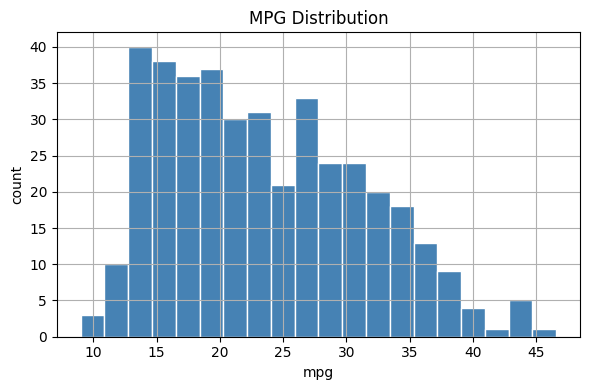

In [5]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
df['mpg'].hist(bins=20, color='steelblue', edgecolor='white')
plt.title('MPG Distribution')
plt.xlabel('mpg')
plt.ylabel('count')
plt.tight_layout()
plt.show()

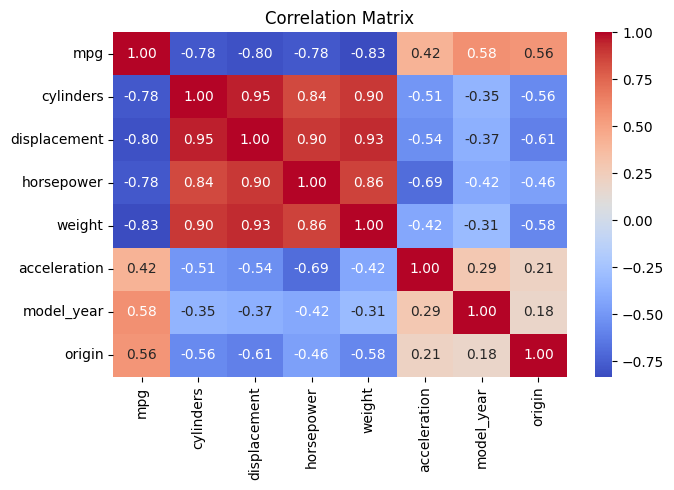

In [6]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

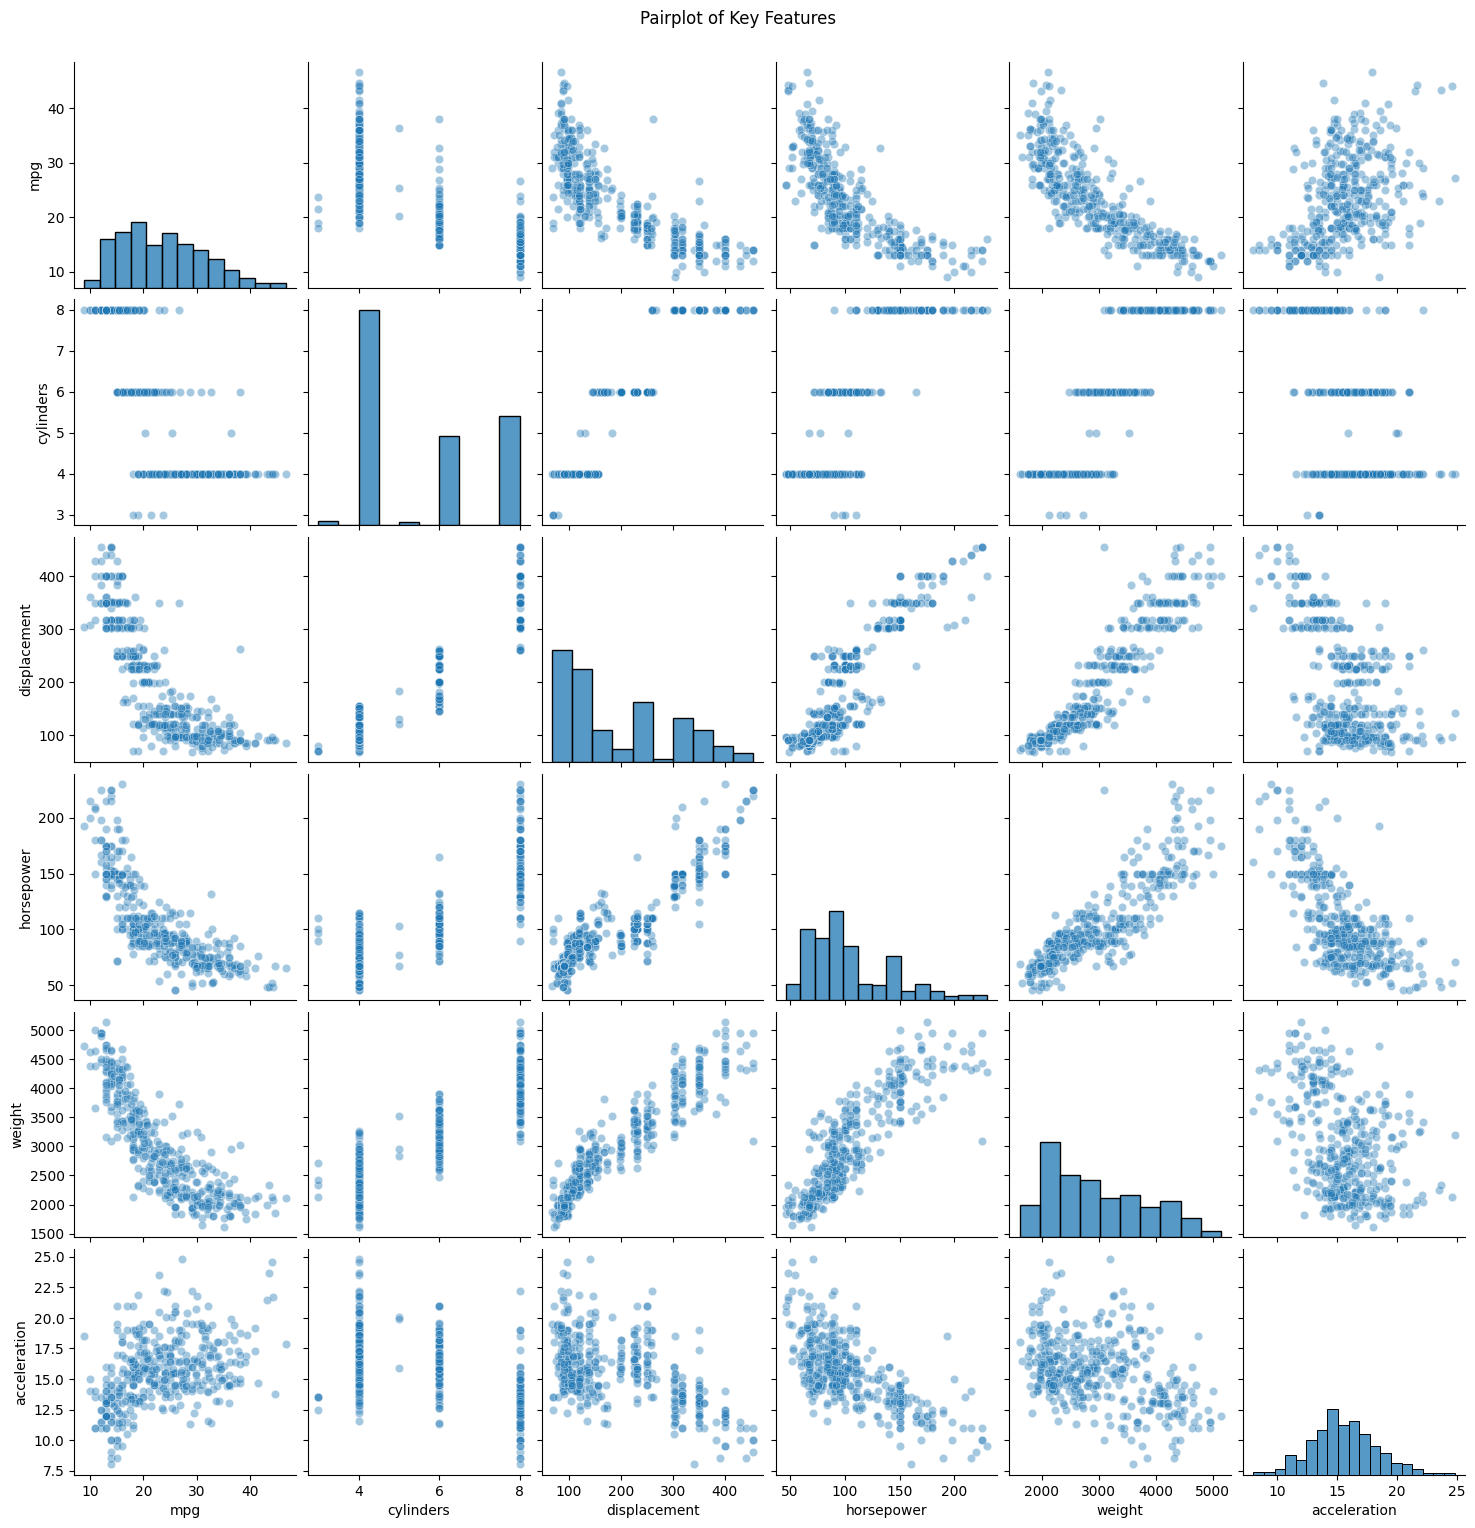

In [7]:
# Pairplot of key features vs mpg
key_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
sns.pairplot(df[key_cols], plot_kws={'alpha': 0.4})
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## 3. Preprocessing & Train/Test Split

In [8]:
X = df.drop(columns=['mpg'])
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (318, 7), Test: (80, 7)


## 4. Build Pipelines

In [9]:
# Preprocessing steps: impute missing values, then scale
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Linear Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])



In [10]:
lr_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or 

## 5. Train & Evaluate

In [11]:
def evaluate(name, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    mae  = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2   = r2_score(y_test, preds)
    print(f"{'='*40}")
    print(f"Model : {name}")
    print(f"MAE   : {mae:.3f}")
    print(f"RMSE  : {rmse:.3f}")
    print(f"R²    : {r2:.3f}")
    return preds

lr_preds = evaluate('Linear Regression', lr_pipeline, X_train, y_train, X_test, y_test)

Model : Linear Regression
MAE   : 2.256
RMSE  : 2.863
R²    : 0.848


## 6. Visualise Predictions

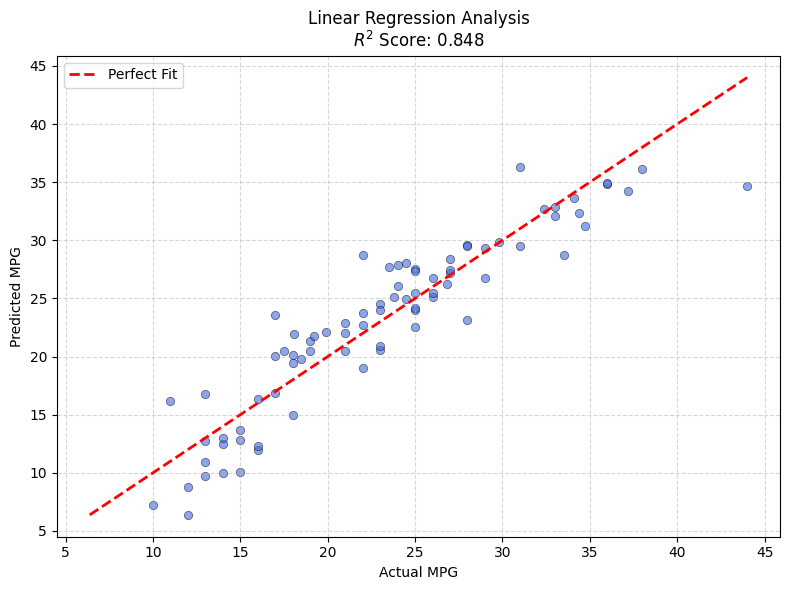

In [12]:
import matplotlib.pyplot as plt

# 1. Fit and Predict using only the Linear Regression pipeline
lr_pipeline.fit(X_train, y_train)
preds = lr_pipeline.predict(X_test)
r2_score = lr_pipeline.score(X_test, y_test)

# 2. Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.6, edgecolors='k', linewidths=0.5, color='royalblue')

# 3. Draw the "Perfect Prediction" line
# This represents where the dots would be if the model was 100% accurate
lims = [min(y_test.min(), preds.min()), max(y_test.max(), preds.max())]
plt.plot(lims, lims, 'r--', lw=2, label='Perfect Fit')

# 4. Labels, Title (with R²), and Legend
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title(f'Linear Regression Analysis\n$R^2$ Score: {r2_score:.3f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5) # Added a light grid for better readability

plt.tight_layout()
plt.show()

## 7. Save Best Model for Streamlit Deployment

Choose the model with the better R² score and save it with `joblib`.
In your Streamlit app, load it with `model = joblib.load('best_model.pkl')`.

In [13]:
import joblib
from sklearn.metrics import r2_score

# 1. Fit and Predict using only the Linear Regression pipeline
lr_pipeline.fit(X_train, y_train)
preds = lr_pipeline.predict(X_test)

# 2. Evaluate performance
score = r2_score(y_test, preds)

# 3. Save the model to a file
joblib.dump(lr_pipeline, 'linear_regression_model.pkl')

print("Linear Regression Analysis Complete")
print("-" * 30)
print(f"R² Score: {score:.4f}")
print("Model saved to: linear_regression_model.pkl")

Linear Regression Analysis Complete
------------------------------
R² Score: 0.8475
Model saved to: linear_regression_model.pkl


# Part 2 : Deploying the model in Streamlit

This guide provides step-by-step instructions for deploying a Streamlit application to the cloud using GitHub and Streamlit Community Cloud.

---

### **Phase 1: Prepare Your Project for the Cloud**

Unlike running code locally, cloud deployment requires specific files so the server knows how to build your application.

1. **Organize Your Files**: Ensure the following files are in your project folder:
* `app.py`: Your main Python script. (Code for `app.py` is given in the next cell)
* `linear_regression_model.pkl` (or `.joblib`): Your trained Scikit-Learn model.
* `model_card.pdf`: Your model documentation.


2. **Create a `requirements.txt` File**: This file tells the cloud which libraries to install. Open **Notepad**, paste the following list, and save it as `requirements.txt` in your project folder:
```text
streamlit
pandas
joblib
scikit-learn==1.6.1

```



---

### **Phase 2: Host Your Code on GitHub**

GitHub acts as the storage unit for your code, which Streamlit Cloud will read to launch your app.

1. **Create a Repository**:
* Log into [GitHub](https://github.com/) and click **New repository**.
* Name it `streamlit-regression-app`.
* Set the visibility to **Public**.


2. **Upload Files**:
* In your new repository, click **Add file** > **Upload files**.
* Drag and drop `app.py`, `requirements.txt`, your model file, and your PDF Model Card.
* Click **Commit changes** to save them to GitHub.



---

### **Phase 3: Deploy to Streamlit Community Cloud**

This step connects your GitHub code to a live, public URL.

1. **Sign In**: Go to [Streamlit Community Cloud](https://share.streamlit.io/) and log in using your GitHub account.
2. **Deploy App**:
* Click **New app**.
* Select your `streamlit-regression-app` repository.
* Ensure the **Main file path** is set to `app.py`.


3. **Launch**: Click **Deploy!**
* Streamlit will set up a virtual environment and install your requirements. This may take a few minutes.
* Once finished, your app is live and accessible via the URL provided in your browser.



---

### **Phase 4: Managing Your Live App**

Your deployment is "synced" with GitHub. This means:

* **Automatic Updates**: If you edit your code and upload the new version to GitHub, the cloud app will detect the change and update itself automatically.
* **Sharing**: You can send the browser URL to anyone, and they can interact with your model without needing to install Python or Anaconda.
* **Logs**: If the app fails to start, click the **Manage app** button in the bottom-right corner of your live site to view the "Logs" and see any error messages.



### Streamlit app.py code. Copy and pase into a notepad file and save in the project folder.
```python
# app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load('linear_regression_model.pkl')

st.title('Auto MPG Predictor')

cylinders    = st.slider('Cylinders', 3, 8, 4)
displacement = st.number_input('Displacement', 50.0, 500.0, 150.0)
horsepower   = st.number_input('Horsepower', 40.0, 250.0, 100.0)
weight       = st.number_input('Weight', 1500.0, 5000.0, 2500.0)
acceleration = st.number_input('Acceleration', 8.0, 25.0, 15.0)
model_year   = st.slider('Model Year', 70, 82, 76)
origin       = st.selectbox('Origin', [1, 2, 3])

input_df = pd.DataFrame([[cylinders, displacement, horsepower,
                           weight, acceleration, model_year, origin]],
                         columns=['cylinders','displacement','horsepower',
                                  'weight','acceleration','model_year','origin'])

if st.button('Predict MPG'):
    prediction = model.predict(input_df)[0]
    st.success(f'Predicted MPG: {prediction:.2f}')
```



---



## Optional : Follow these steps to set up your environment and run the application on your local machine.

### **Phase 1: Environment Setup**

1. **Open Anaconda Navigator** and launch the **Anaconda Prompt**.


2. **Create a project folder** named `streamlit_lab` and navigate to it using `cd path/to/folder`.


3. **Create a virtual environment** to keep your dependencies organized:
* Run: `conda create -n streamlit_env python=3.10`.




4. **Activate the environment**:
* Run: `conda activate streamlit_env`.




5. **Install the necessary libraries**:
* Run: `pip install streamlit pandas joblib`.




6. **Verify the installation**:
* Run: `streamlit --version`.





---

### **Phase 2: Building & Launching the App**

1. **Prepare your files**: Ensure your trained model file (`linear_regression_model.pkl`) is saved inside the `streamlit_lab` folder.

2. **Create the Script**: Open **Notepad** (or your preferred text editor) and paste the **Streamlit Snippet** provided in the next cell.


3. **Save the file** as `app.py` inside your `streamlit_lab` folder.


4. **Run the application**:
* In the Anaconda Prompt, run: `streamlit run app.py`.




5. **View the App**: Your default web browser will open the application automatically.



---

### **Phase 3: The Edit & Refresh Cycle**

To make changes to your predictor without restarting the server:

1.
**Keep the server running** in the Anaconda Prompt.


2.
Modify `app.py` in your text editor.


3.
**Save the file**.


4.
**Click 'Rerun'** in the top-right corner of your browser to see the changes instantly.



> **Tip:** If you see a `FileNotFoundError` for the model, double-check that `best_model.pkl` is in the exact same folder as your `app.py` file.

---

